In [11]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import cv2
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import joblib

In [12]:
imgArray = cv2.imread("archive/train/angry/Training_3908.jpg")
imgArray.shape


(224, 224, 3)

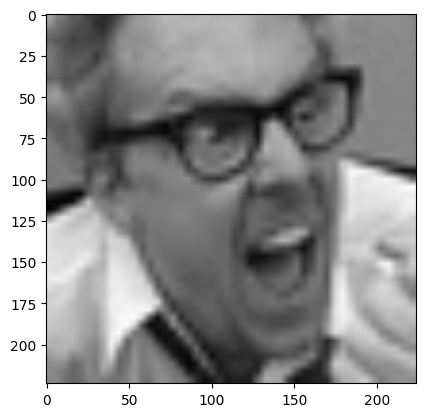

In [13]:
plt.imshow(imgArray)

In [14]:
def create_datasets(imgSize):
    path_train = "archive/test/"
    emotion_labels = ['neutral', 'happy', 'angry', 'surprise', 'disgust', 'fear', 'sad']
    X = []
    y = []
    for emotion in emotion_labels:
        imges = os.path.join(path_train,emotion)              
        for img in os.listdir(imges):
            img_path = os.path.join(imges, img)
            imgArry = cv2.imread(img_path)
            resized_img = cv2.resize(imgArry, (imgSize, imgSize))
            X.append(resized_img)
            y.append(emotion_labels.index(emotion))
            cv2.imwrite(img_path, resized_img)   #img is formated with new img of new size
    X = np.array(X)
    y = np.array(y)
    return X, y    
    
imgSize = 224
X, y = create_datasets(imgSize) 

In [15]:
chunkSize = 200
scaler = StandardScaler()
for i in range(0, X.shape[0], chunkSize):
    X_chunk = X[i:i+chunkSize].reshape(len(X[i:i+chunkSize]), -1).astype(np.float32)
    X_chunk = scaler.fit_transform(X_chunk)
    X[i:i+chunkSize] = X_chunk.reshape(len(X_chunk), imgSize, imgSize, 3)

In [16]:
X.shape

(7178, 224, 224, 3)

In [17]:
encoder = OneHotEncoder(sparse_output=False)
y_reshaped = np.array(y).reshape(-1, 1)
y_categorical = encoder.fit_transform(y_reshaped)

In [18]:
y_categorical.shape

(7178, 7)

In [10]:
#joblib.dump((X, y_categorical), 'emotion_recognition_data_train.pkl')

['emotion_recognition_data_train.pkl']

In [19]:
joblib.dump((X, y_categorical), 'emotion_recognition_data_test.pkl')

['emotion_recognition_data_test.pkl']

In [20]:
y_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])